# Preliminary Data Analysis

In [1]:
# import all necessary packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.signal as signal
from IPython import display
import time

In [2]:
# load the data
db_data = pd.read_excel("LGS1_Overall_2023_minutes.xlsx", sheet_name="LGS#1 Aug 23")
db_data

,TimeStamp,Active Power (MW),Grid (Aux: 0 & FCE:1),Reactive Power (MVAr),Exc Voltage (Volt),Exc Current (A),V Phase 1 (Volt),V Phase 2 (Volt),V Phase 3 (Volt),Current Phase 1 (A),...,LGB Metal Temp 2,LGB Oil Temp,Gen air Cooler Air Otlet Temp,Gen air Cooler Water Inlet Temp,Gen air Cooler Water Otlet Temp,Gen Cooler Water Flow (LPM),UGB Cooling Water Flow (LPM),LGB Cooling Water Flow (LPM),Lower Canal Level (msAL),TailRace Level (msAL)
0,2023-08-01 00:00:01,55.66,1.0,14.74,109.71,699.73,10.79,10.68,11.12,7.65,...,53.0,71.0,64.00,70.04,68.00,3918.38,32.42,944.38,314.34,165.96
1,2023-08-01 00:01:01,54.99,1.0,21.73,130.01,779.04,10.77,10.63,10.90,7.66,...,53.0,71.0,64.00,70.14,68.00,3932.13,32.42,946.55,314.32,165.96
2,2023-08-01 00:02:01,58.95,1.0,28.59,127.88,802.18,10.92,10.95,10.90,7.67,...,53.0,71.0,64.00,70.25,68.00,3927.96,32.42,945.80,314.30,165.96
3,2023-08-01 00:03:01,58.78,1.0,26.95,144.37,789.71,10.88,10.79,10.91,7.68,...,53.0,71.0,64.11,70.36,68.02,3928.48,32.42,946.50,314.29,165.96
4,2023-08-01 00:04:01,58.61,1.0,31.77,166.23,849.67,10.84,10.61,10.91,7.69,...,53.0,71.0,64.21,70.47,68.03,3915.80,32.42,943.63,314.26,165.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44635,2023-08-31 23:55:58,8.81,1.0,13.44,107.19,625.43,10.71,10.80,10.76,2.36,...,53.0,71.0,48.02,53.00,53.00,3917.53,32.43,953.33,314.60,166.15
44636,2023-08-31 23:56:58,6.77,1.0,20.62,112.96,673.97,10.71,10.83,10.74,2.35,...,53.0,71.0,47.98,53.00,53.00,3922.21,32.43,953.86,314.62,166.15
44637,2023-08-31 23:57:58,4.64,1.0,14.75,114.25,643.39,10.70,10.87,10.72,2.34,...,53.0,71.0,47.93,53.00,53.00,3923.24,32.43,954.49,314.62,166.15
44638,2023-08-31 23:58:58,4.86,1.0,13.22,85.60,607.85,10.70,10.91,10.70,2.33,...,53.0,71.0,47.88,53.00,53.00,3917.94,32.43,954.82,314.61,166.15


In [3]:
# checking all columns contains NaN
print(db_data.isnull().sum())

# clear all column with NaN input
db_data = db_data.dropna(axis=0)
db_data = db_data.dropna(axis=1)

TimeStamp                          0
Active Power (MW)                  0
Grid (Aux: 0 & FCE:1)              0
Reactive Power (MVAr)              0
Exc Voltage (Volt)                 0
Exc Current (A)                    0
V Phase 1 (Volt)                   0
V Phase 2 (Volt)                   0
V Phase 3 (Volt)                   0
Current Phase 1 (A)                0
Current Phase 2 (A)                0
Current Phase 3 (A)                0
Modbus MVAr                        0
Modbus MVA                         0
PF (Cos Phi)                       0
Freq (hz)                          0
Speed (RPM)                        0
WG Opening (%)                     0
Speed (RPM).1                      0
Penstock Pressure (Kg/cm2)         0
Penstoc Flow (Cumecs)              0
Turbine Flow (Cumecs)              0
Eff (Cumecs/MW)                    0
UGB X (µm)                         0
UGB Y (µm)                         0
LGB X (µm)                         0
LGB Y (µm)                         0
T

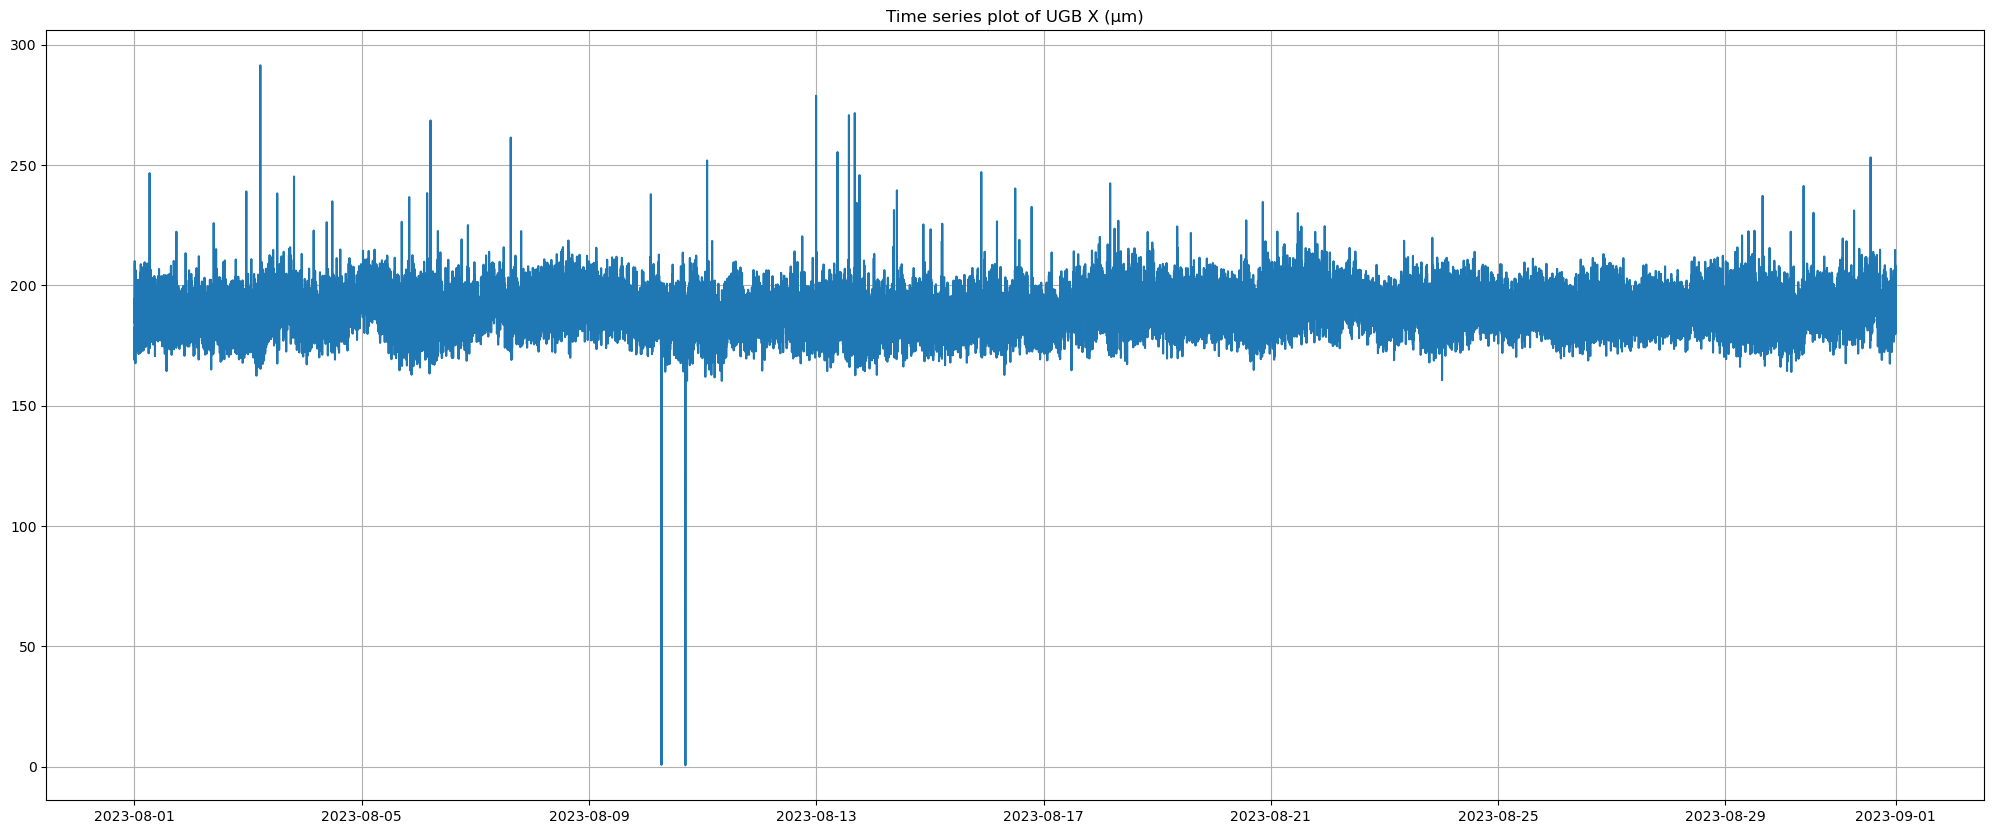

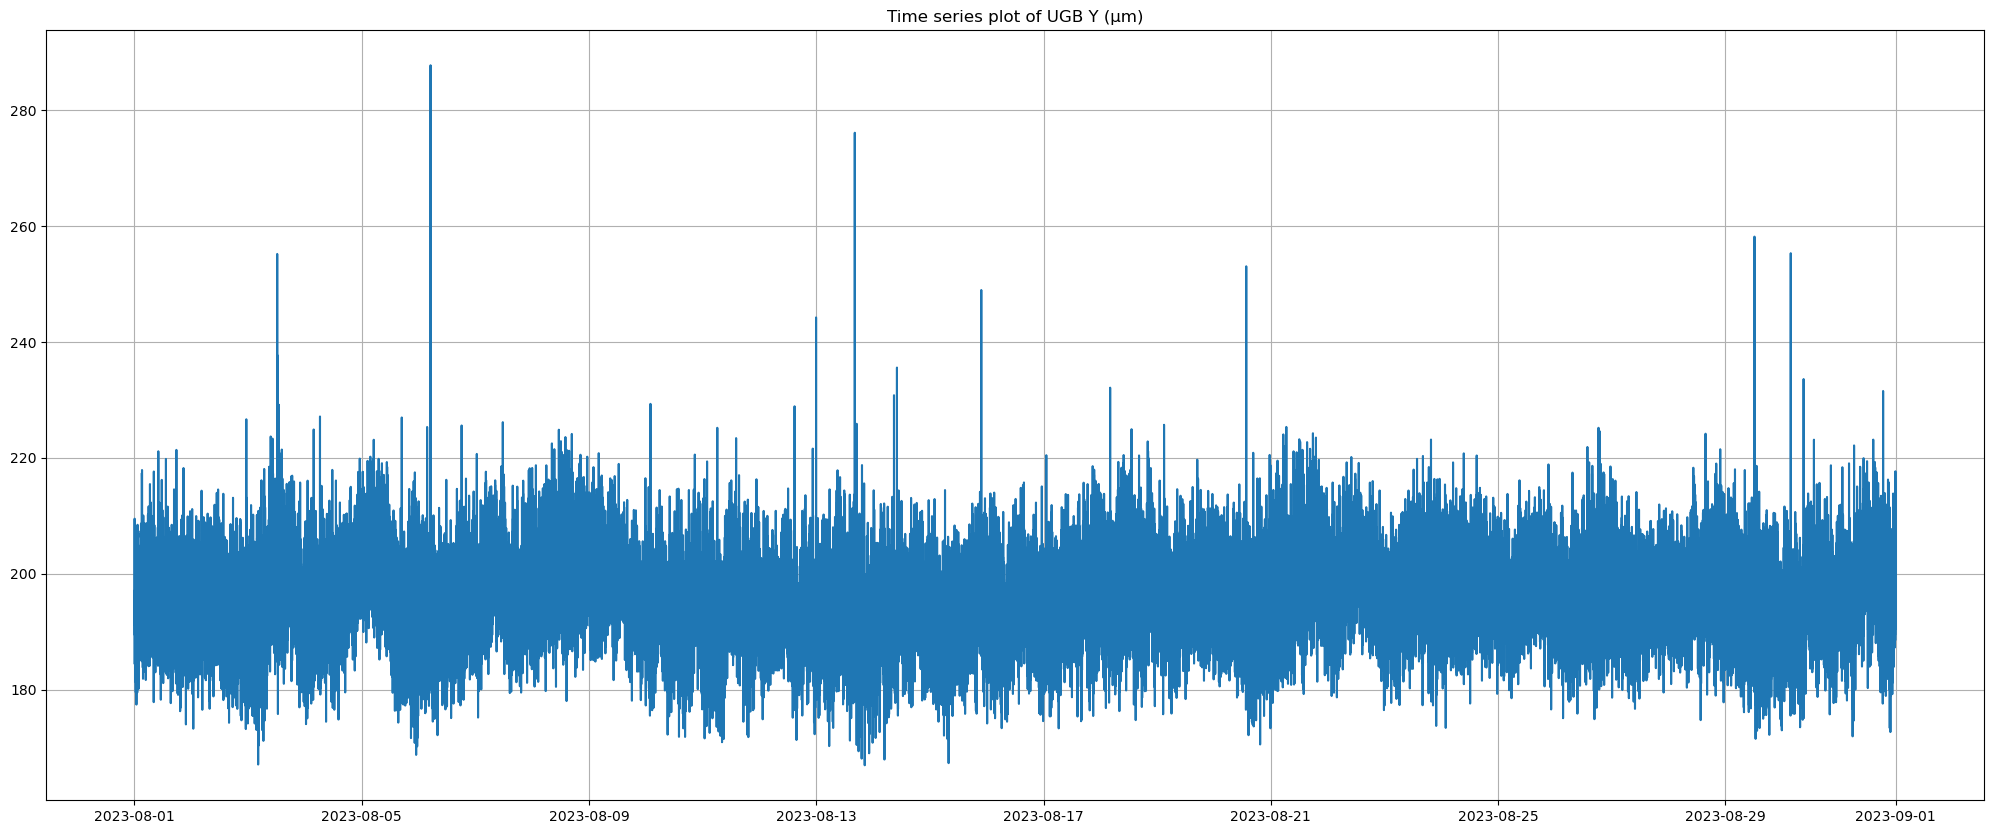

In [4]:
# plot time series of data
def plot_time_series(time_data, value_data):
    fig =  plt.figure(figsize=(25,10))
    ax = fig.add_subplot(111)
    ax.plot(time_data, value_data)
    ax.set_title("Time series plot of " + value_data.name)
    plt.grid()
    plt.show()

plot_time_series(db_data['TimeStamp'], db_data['UGB X (µm)'])
plot_time_series(db_data['TimeStamp'], db_data['UGB Y (µm)'])


In [5]:
# resample function
def resample_data(time_data, value_data, n_samples):
    v_resampled, t_resampled = signal.resample(value_data, n_samples, time_data)
    v_resampled = pd.Series(v_resampled, name=value_data.name + '(Resampled)')
    t_resampled = pd.Series(t_resampled)

    return v_resampled, t_resampled 

# resample the vibration data
ugb_x = db_data['UGB X (µm)']
ugb_y = db_data['UGB Y (µm)']
time_data = db_data['TimeStamp'].dt.hour * 3600 + db_data['TimeStamp'].dt.minute * 60 + db_data['TimeStamp'].dt.second

n_samples = len(ugb_x) * 60 * 20 # change sampling from each minute to each second

ugb_x_resampled, time_data_resampled = resample_data(time_data, ugb_x, n_samples)
ugb_y_resampled, time_data_resampled = resample_data(time_data, ugb_y, n_samples)

#ugb_x_resampled, time_data_resampled = signal.resample(ugb_x, n_samples, time_data)
#ugb_y_resampled, time_data_resampled = signal.resample(ugb_y, n_samples, time_data)

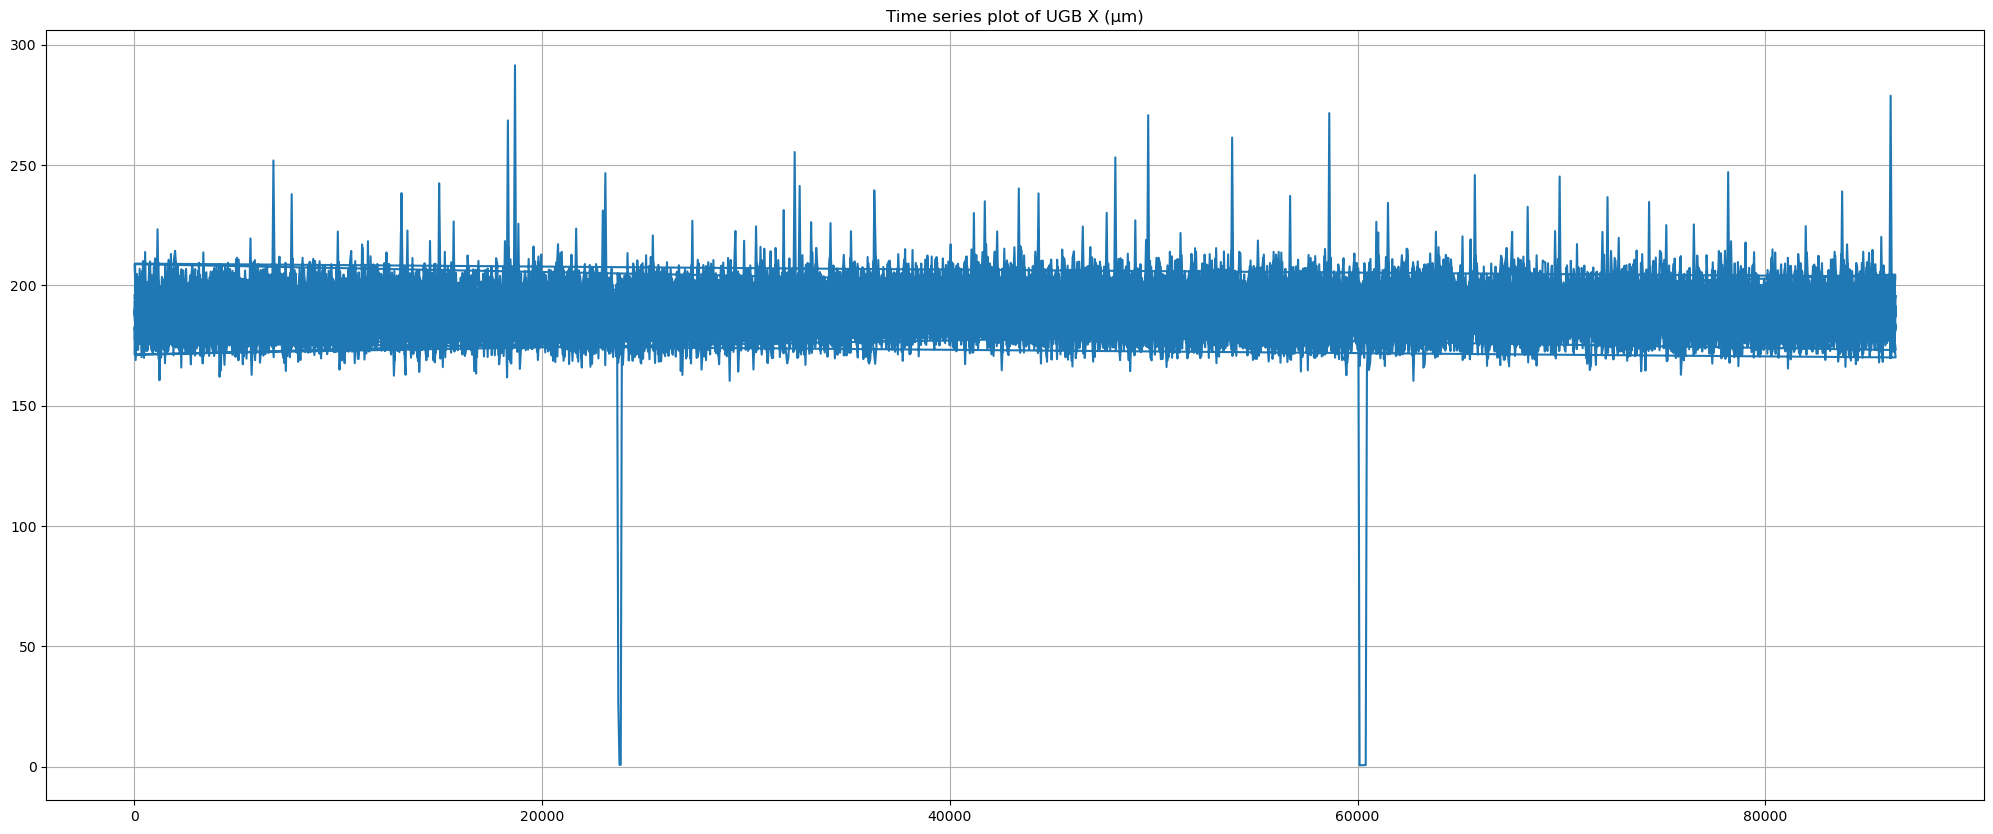

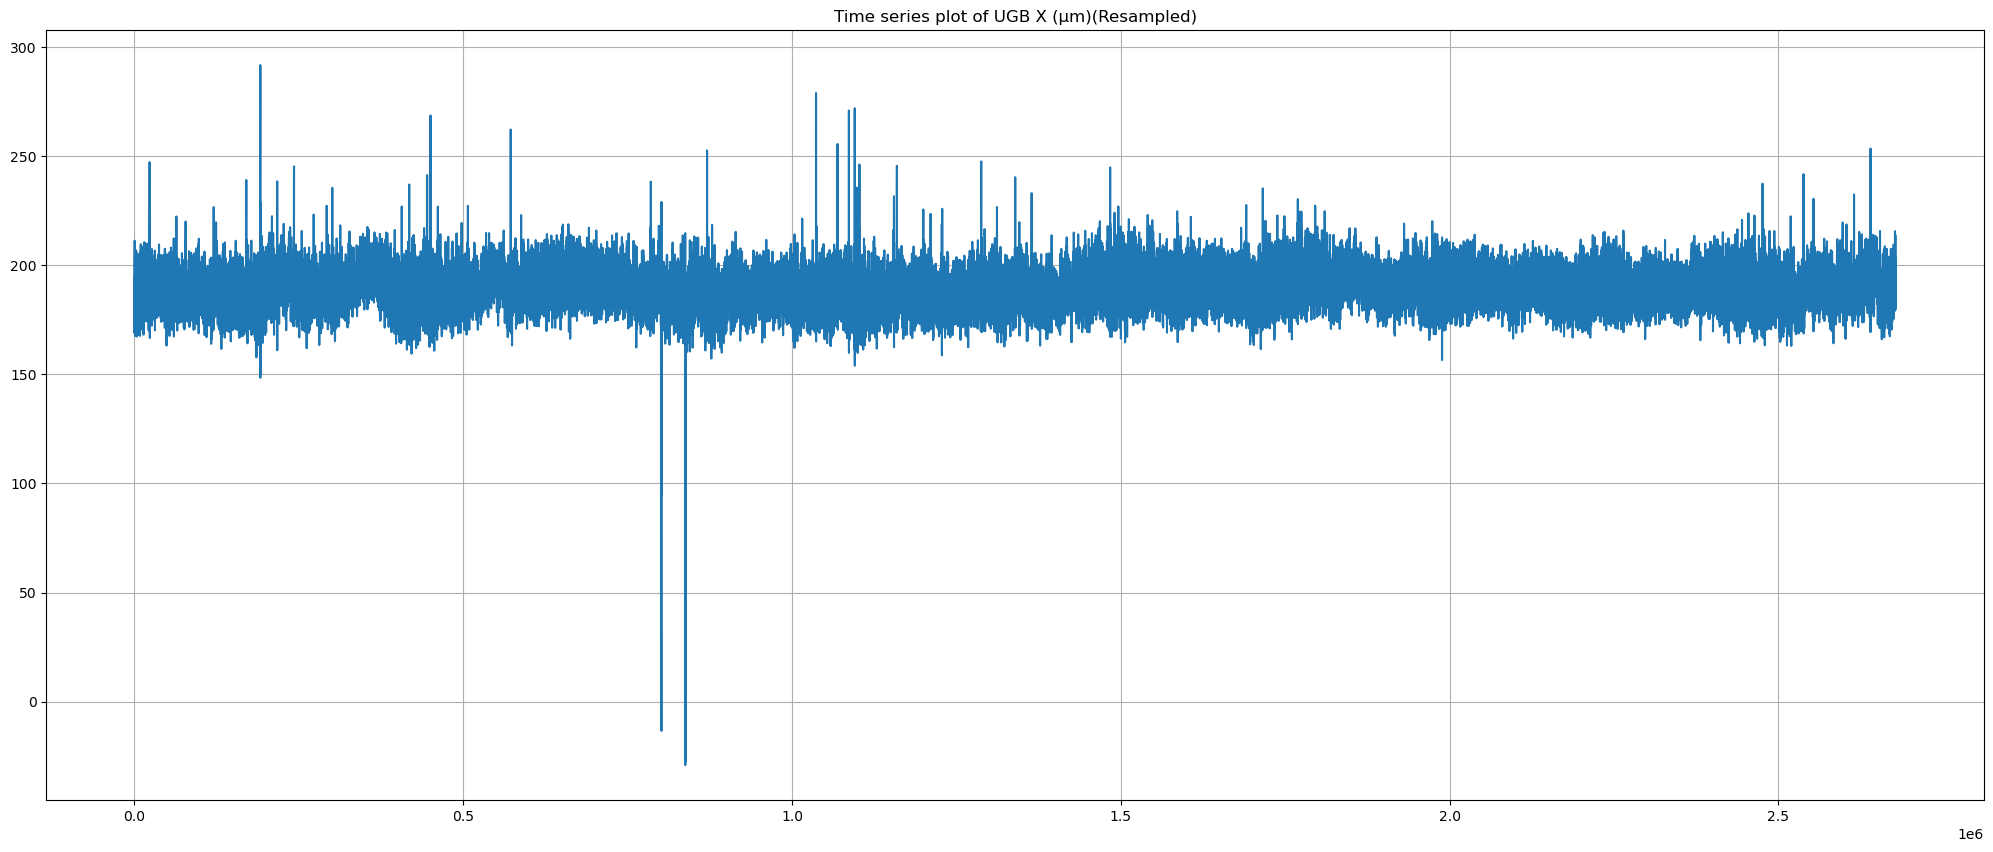

In [6]:
plot_time_series(time_data, ugb_x)
plot_time_series(time_data_resampled, ugb_x_resampled)

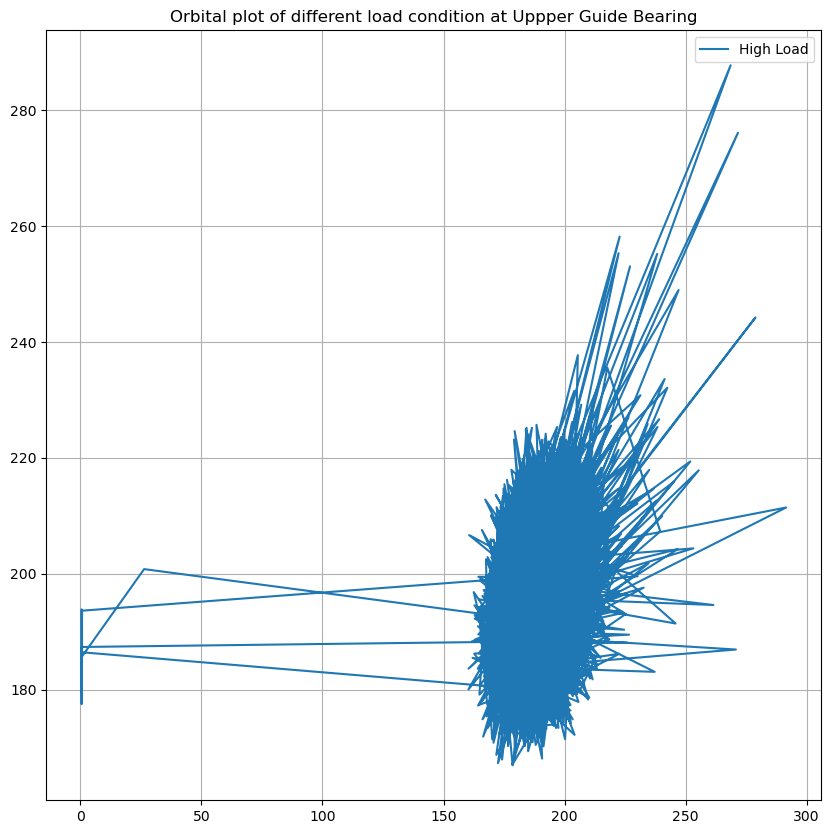

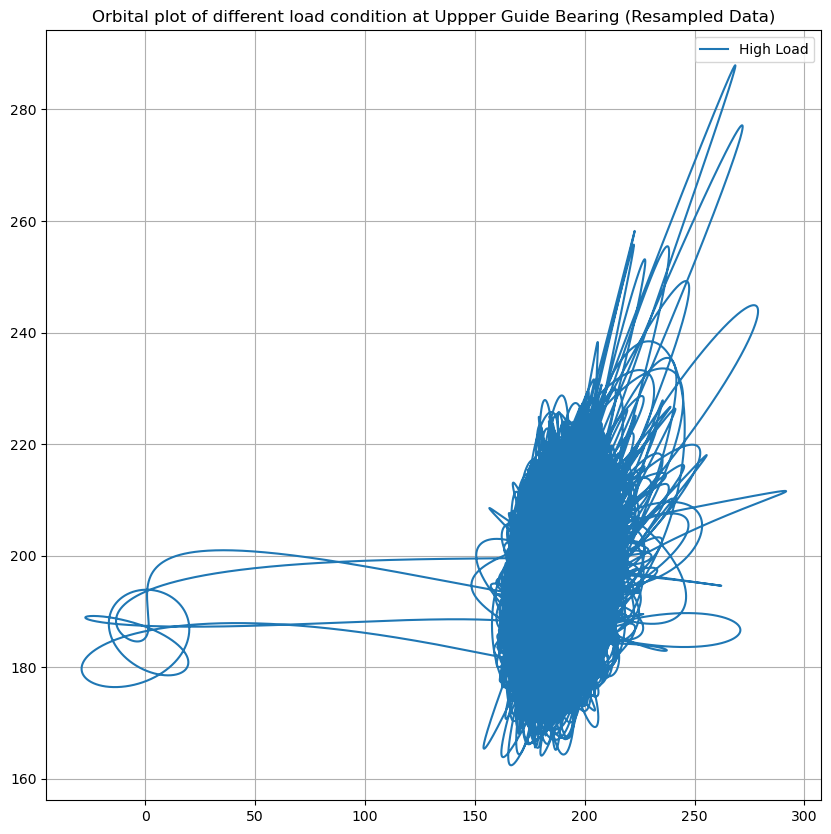

In [8]:
# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x, ugb_y)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x_resampled, ugb_y_resampled)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing (Resampled Data)")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

plt.show() 

In [ ]:
# create correlation map of data
df = db_data
f = plt.figure(figsize=(40, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Process Vibration Data

In [5]:
# selecting proximity sensor data
vib_idx_name = ['TimeStamp', 'UGB X (µm)', 'UGB Y (µm)', 'TGB X (µm)', 'TGB X (µm)', 'LGB X (µm)', 'LGB X (µm)']
vib_db_data = db_data[vib_idx_name]
vib_db_data

,TimeStamp,UGB X (µm),UGB Y (µm),TGB X (µm),TGB X (µm),LGB X (µm),LGB X (µm)
0,2023-08-01 00:00:01,182.10,191.44,92.29,92.29,117.16,117.16
1,2023-08-01 00:01:01,168.97,197.09,102.89,102.89,111.49,111.49
2,2023-08-01 00:02:01,180.81,191.21,80.90,80.90,118.90,118.90
3,2023-08-01 00:03:01,173.15,192.61,84.62,84.62,108.97,108.97
4,2023-08-01 00:04:01,186.65,196.44,82.11,82.11,110.94,110.94
...,...,...,...,...,...,...,...
44635,2023-08-31 23:55:58,191.27,206.34,117.94,117.94,115.49,115.49
44636,2023-08-31 23:56:58,187.86,198.73,147.65,147.65,114.98,114.98
44637,2023-08-31 23:57:58,191.78,208.65,138.95,138.95,123.37,123.37
44638,2023-08-31 23:58:58,184.54,204.79,119.51,119.51,118.19,118.19


In [6]:
ugb_x = vib_db_data['UGB X (µm)']
ugb_y = vib_db_data['UGB Y (µm)']

In [ ]:
# create orbital plot
f = plt.figure(figsize=(40, 30))

fs = 0.6
length = len(vib_db_data)
t = np.arange(0, length, (1/fs))

x0 = []
y0 = []

count = 0

for i in range(len(vib_db_data)):
    count += 1

    x = ugb_x[i]
    y = ugb_y[i]

    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(212)
    ax.scatter(x, y)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("Overall Orbital Plot")

    if i > 0:
        ax.plot(x0, y0)

    x0.append(x)
    y0.append(y)

    plt.show

    display.clear_output(wait=True)
    display.display(fig)
    time.sleep(0.01)
    plt.clf()

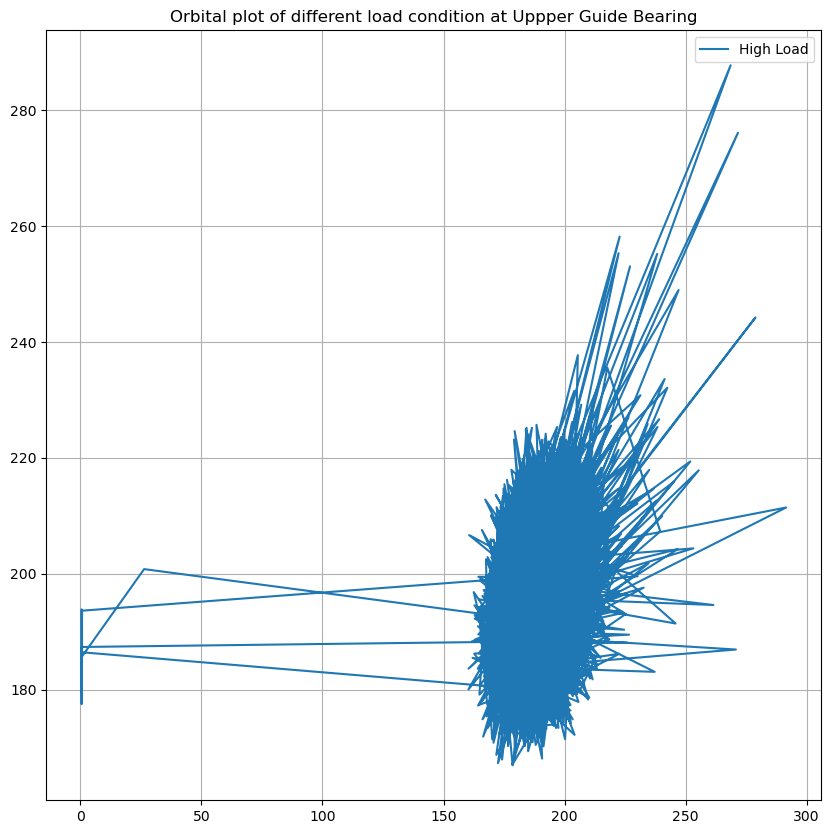

In [7]:
# plot the orbit of data
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
# ax.plot(ugb_ovr_x, ugb_ovr_y)
ax.plot(ugb_x, ugb_y)
ax.set_title("Orbital plot of different load condition at Uppper Guide Bearing")
ax.legend(['High Load', 'Normal Load', 'Low Load'])
plt.grid()

plt.show() 

## Data Filtering Trial

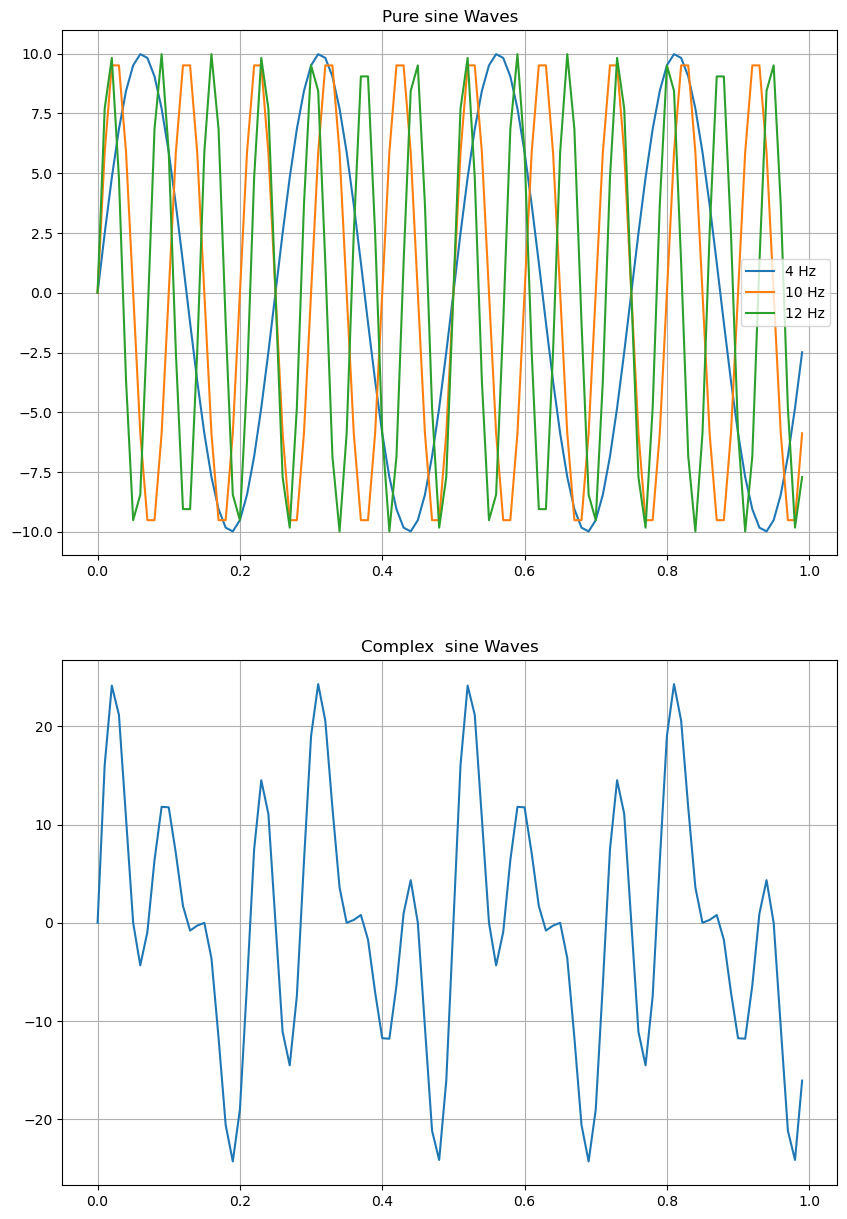

In [38]:
# creating sine waves
amp = 10
f1 = 4
f2 = 10
f3 = 14
fs = 100
t = np.arange(0, 1, 1/fs)

x1 = amp * np.sin(2 * np.pi * f1 * t)
x2 = amp * np.sin(2 * np.pi * f2 * t)
x3 = amp * np.sin(2 * np.pi * f3 * t)

x = x1 + x2 + x3

# plot the time series of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(t, x1)
ax.plot(t, x2)
ax.plot(t, x3)
ax.set_title("Pure sine Waves")
ax.legend(['4 Hz', '10 Hz', '12 Hz'])
plt.grid()

ax = fig.add_subplot(212)
ax.plot(t, x)
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show() 

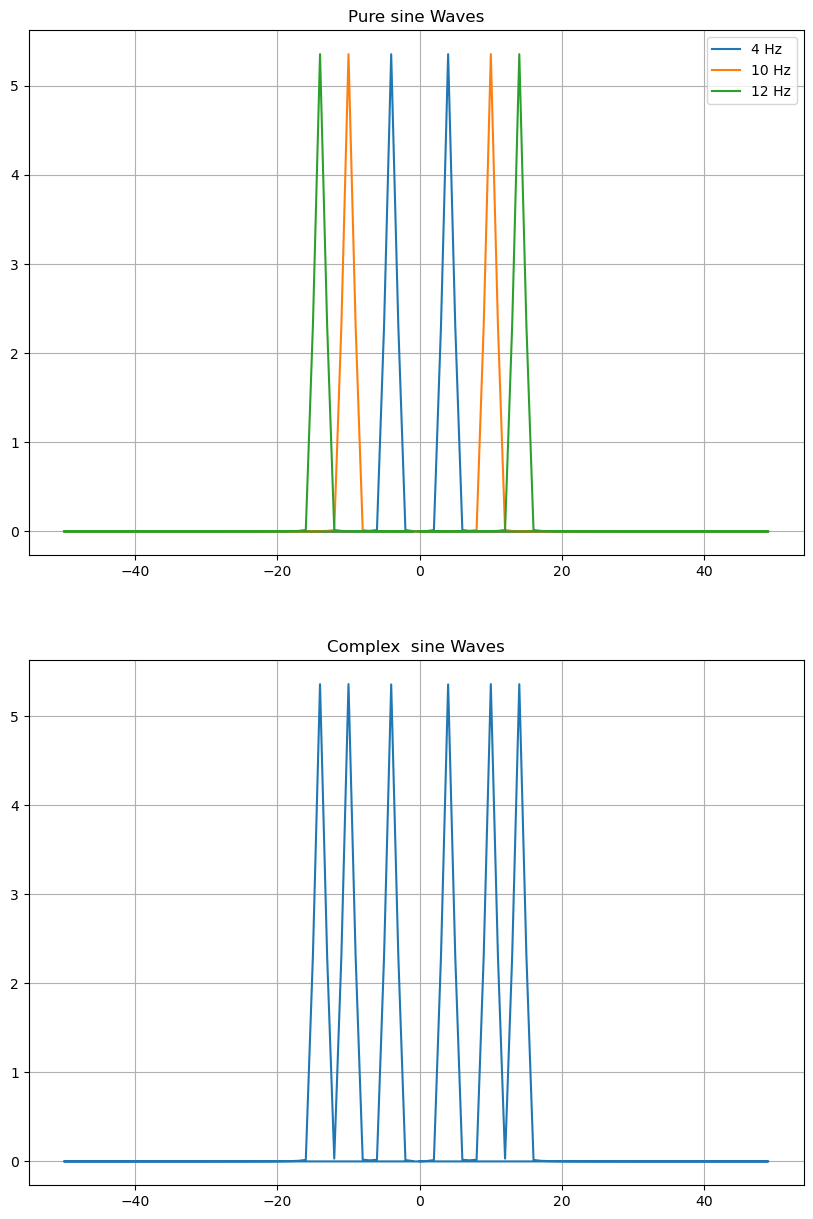

In [39]:
# bring to frequency domain
# nfft = int(pow(2, np.ceil(np.log2(len(x)))))
win = np.hamming(len(x))
# f = (fs/2) * np.arange(0,1,1/(nfft/2+1))
f = np.fft.fftfreq(len(x), t[1] - t[0])

X = 2/len(x) * np.fft.fft(win*x)
X1 = 2/len(x) * np.fft.fft(win*x1)
X2 = 2/len(x) * np.fft.fft(win*x2)
X3 = 2/len(x) * np.fft.fft(win*x3)

# plot the spectrum of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(f, abs(X1))
ax.plot(f, abs(X2))
ax.plot(f, abs(X3))
ax.set_title("Pure sine Waves")
ax.legend(['4 Hz', '10 Hz', '12 Hz'])
plt.grid()

ax = fig.add_subplot(212)
ax.plot(f, abs(X))
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show() 

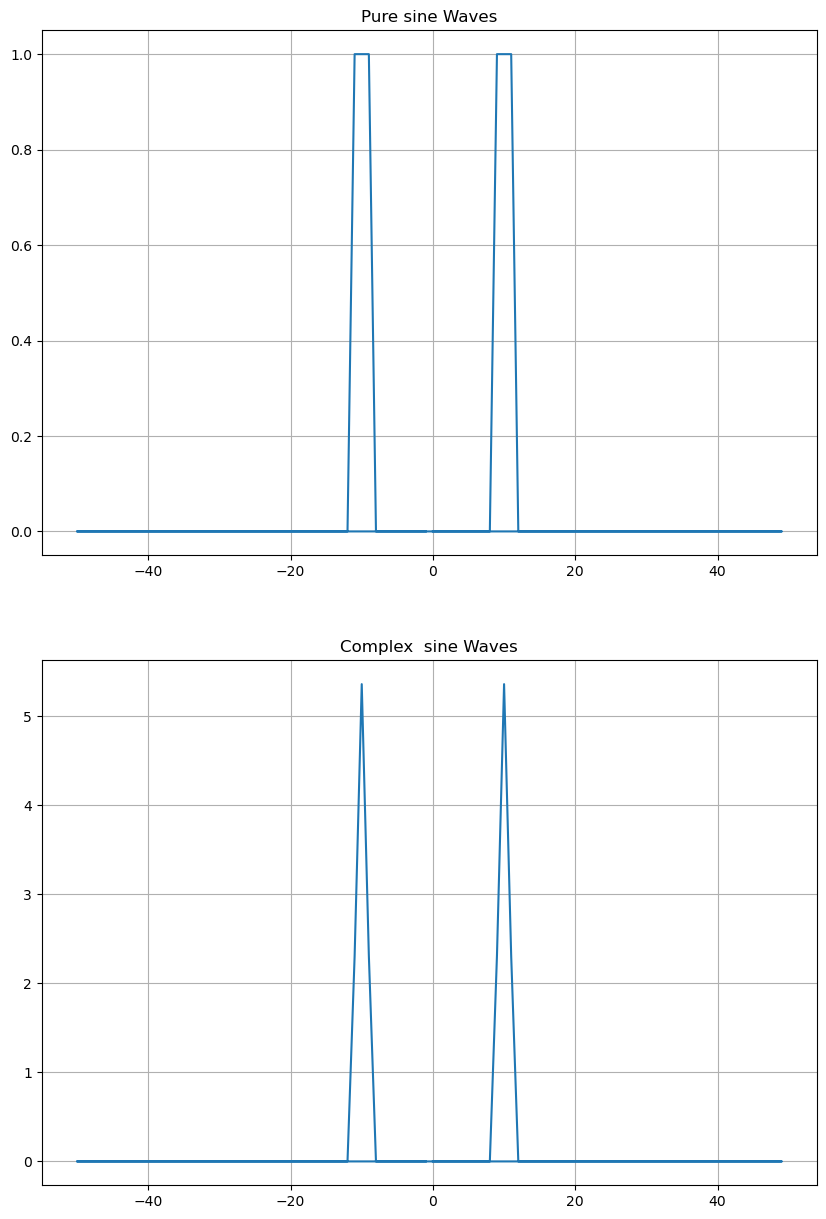

In [40]:
# apply rectangular filter
indices = (abs(f) >= 9) & (abs(f) <= 11)
rect_filter = np.zeros_like(x)
rect_filter[indices] = 1
X_filtered = X * rect_filter

# plot the filtered spectrum of data
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211)
ax.plot(f, rect_filter)
ax.set_title("Pure sine Waves")
plt.grid()

ax = fig.add_subplot(212)
ax.plot(f, abs(X_filtered))
ax.set_title("Complex  sine Waves")
plt.grid()

plt.show() 


In [ ]:
# apply invers FFT
x_filtered = np.fft.ifft(X_filtered)
x_filtered = x_filtered.real 